# Tarea 1: Activaciones y pasada hacia adelante en una red neuronal <br/> CC6204 Deep Learning, Universidad de Chile  <br/> Hoja de respuestas
## Nombre: Fabio Gaudino
Fecha de entrega: 6 de septiembre de 2021

In [ ]:
# Este notebook está pensado para correr en CoLaboratory. 
# Lo único imprescindible por importar es torch 
import torch

# Posiblemenete quieras instalar e importar ipdb para debuggear.
# Si es así, descomenta lo siguiente
# !pip install -q ipdb
# import ipdb

# Aqui instalamos la libreria de correccion del curso
!pip install "git+https://github.com/dccuchile/CC6204.git@master#egg=cc6204&subdirectory=autocorrect"

  Cloning https://github.com/dccuchile/CC6204.git (to revision master) to /tmp/pip-install-a3jckpsn/cc6204_02773517e2dd47c48efff581e5597065
  Running command git clone -q https://github.com/dccuchile/CC6204.git /tmp/pip-install-a3jckpsn/cc6204_02773517e2dd47c48efff581e5597065
  Created wheel for cc6204: filename=cc6204-0.5.0-py3-none-any.whl size=5800 sha256=275d6e96d0724fa8ac63633594695593c1a9b3ef0d41c5aeb74423aabb6c43ea
  Stored in directory: /tmp/pip-ephem-wheel-cache-9tbjildd/wheels/3c/26/f5/2abeb546c3ff1ab6e69113a3ae69bc0ac3442642727fd0dcc2
Successfully built cc6204


In [ ]:
# importamos las herramientas del curso
from cc6204 import AutoCorrect, FailedTest

# ingresa el host y port que posteamos en u-cursos

corrector = AutoCorrect(host='cc6204.dcc.uchile.cl', port=443)

# anota el token que te daremos en u-cursos

token = ']ye/Ox;nsz'

Connection stablished


# Parte 1: Funciones de activación y función de salida

## 1a) Funciones de activación

In [ ]:
def sig(T):
  if type(T)==list:
    T=torch.tensor(T)
  return torch.reciprocal(1 + torch.exp(-1 * T))

def tanh(T):
  if type(T)==list:
    T=torch.tensor(T)
  E = torch.exp(T)
  e = torch.exp(-1 * T)
  return (E - e) * torch.reciprocal(E + e)

# Tu código acá
def relu(T):
  if type(T)==list:
    T=torch.tensor(T)
  zero=torch.zeros(T.size())
  return torch.maximum(T, zero)

def swish(T, beta=1): 
  if type(T)==list:
    T=torch.tensor(T)
  return T*sig(beta*T)

def celu(T, alpha=1):
  if type(T)==list:
    T=torch.tensor(T)
  x1=relu(T)
  x2=alpha*(torch.exp(T*(1/alpha))-1)
  zero2=torch.zeros(x2.size())
  x2=torch.minimum(x2, zero2)
  return x1+x2

In [ ]:
# Tests del API del curso
test_relu = corrector.get_test_data(homework=1, question="1a", test=1, token=token)
test_swish, swish_par = corrector.get_test_data(homework=1, question="1a", test=2, token=token)
test_celu, celu_par = corrector.get_test_data(homework=1, question="1a", test=3, token=token)
# probablemente quieras convertr los variables test_* a un tensor, ya que por defecto son listas

corrector.submit(homework=1, question="1a", test=1, token=token, answer=relu(test_relu))
corrector.submit(homework=1, question="1a", test=2, token=token, answer=swish(test_swish, swish_par))
corrector.submit(homework=1, question="1a", test=3, token=token, answer=celu(test_celu, celu_par))

Correct Test!
Correct Test!
Correct Test!


## 1b) Softmax

Demostración: 

Para la secuencia $(x_1,\ldots,x_n)$  el resultado de $\text{softmax}(x_1,\ldots,x_n)$ es otra secuencia $(s_1,\ldots,s_n)$ que cumple con:

\begin{equation}
s_i = \frac{e^{x_i}}{\sum_{j=1}^{n}e^{x_j}}
\end{equation}

Si le restamos un valor M a todos los elementos de la secuencia $(x_1,\ldots,x_n)$ nos queda $(x_1-M,\ldots,x_n-M)$. Luego evaluando estos elementos en la función softmax nos queda:
\begin{equation}
s_i* = \frac{e^{x_i-M}}{\sum_{j=1}^{n}e^{x_j-M}}=\frac{e^{x_i}e^{-M}}{\sum_{j=1}^{n}e^{x_j}e^{-M}} = \frac{e^{x_i}e^{-M}}{e^{-M}\sum_{j=1}^{n}e^{x_j}} = \frac{e^{x_i}}{\sum_{j=1}^{n}e^{x_j}} = s_i
\end{equation}

Como esto se cumple $ \forall i \in \{1,\ldots, n \}$, concluimos que $\text{softmax}(x_1-M,\ldots,x_n-M)=\text{softmax}(x_1,\ldots,x_n)$.

In [ ]:
# Tu código acá

def softmax(T, dim=1, estable=True):
  if type(T)==list:
    T=torch.tensor(T)
  if estable:
    T=T-torch.amax(T, dim, keepdim=True)
  expT=torch.exp(T)
  sumT=torch.sum(expT, dim, keepdim=True)
  return expT * torch.reciprocal(sumT)
  

In [ ]:
# Tests del API del curso
test_softmax, _dim = corrector.get_test_data(homework=1, question="1b", test=1, token=token)
corrector.sumbit(homework=1, question="1b", test=1, token=token, answer=softmax(test_softmax, dim=_dim))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Old method `sumbit` has been renamed to `submit`, please use that instead.
  This is separate from the ipykernel package so we can avoid doing imports until


Correct Test!


# Parte 2: Red neuronal y pasada hacia adelante (forward)

## 2a) Clase para red neuronal, 2b) Iterando por parametros, 2d) Pasada hacia adelante

In [ ]:
# Tu código debiera continuar así 

class FFNN(torch.nn.Module):
  def __init__(self, F, l_h, l_a, C):
    #Verificamos que las variables sean validas:

    #F:
    assert type(F)==int, "F debe ser una número entero"

    #l_h:
    assert type(l_h)==list, "l_h debe ser una lista"

    #l_a:
    assert type(l_a)==list, "l_a debe ser una lista"
    for funcion in l_a:
      assert funcion in [sig, tanh, relu, swish, celu], "La función de activación "+str(funcion)+" no es valida"

    #C:
    assert type(C)==int and C>1, "C debe ser un numero entero mayor o igual a 2"
    
    #Definimos los parámetros de la clase:

    super(FFNN, self).__init__()

    #Funciones de activación
    self.funciones_de_activacion = l_a

    #W_1
    self.entrada = torch.nn.Parameter(torch.rand(F,l_h[0]))

    #b_1:
    self.entrada_sesgo = torch.nn.Parameter(torch.zeros(1,l_h[0]))

    #W_i, con i perteneciente a {2,...,L}; con L número de capas escondidas
    self.capas_escondidas = torch.nn.ParameterList([torch.nn.Parameter(torch.rand(l_h[k], l_h[k+1])) for k in range(len(l_h)-1)]) 

    #b_i, con i perteneciente a {2,...,L}; con L número de capas escondidas
    self.capas_escondidas_sesgo = torch.nn.ParameterList([torch.nn.Parameter(torch.zeros(1, l_h[k+1])) for k in range(len(l_h)-1)])

    #U
    self.salida = torch.nn.Parameter(torch.rand(l_h[len(l_h)-1],C))

    #c (sesgo):

    self.salida_sesgo = torch.nn.Parameter(torch.zeros(1,C))
  
  def resumen(self):
    # usa self.parameters() o self.named_parameters()
    print("Resumen parámetros:")
    for nombre, parametros in FFNN.named_parameters(self):
      print('')
      print(nombre)
      print('dimensiones: '+str(parametros.size()))
      print('')
  
  def forward(self, x):
    # Usa los parámetros y funciones de activación.
    # El valor de retorno debiera ser y = softmax(capa_de_salida).

    #Capa de entrada:
    h = self.funciones_de_activacion[0](x.mm(self.entrada) + self.entrada_sesgo)

    #Capas ocultas:
    numero_capas_escondidas=len(self.capas_escondidas)
    for k in range(numero_capas_escondidas): 
      h = self.funciones_de_activacion[k+1](h.mm(self.capas_escondidas[k]) + self.capas_escondidas_sesgo[k])

    #Capa de salida:   
    h = h.mm(self.salida) + self.salida_sesgo 
    y = softmax(h,1)  
    return y 

  def set_pesos(self, U, W1, W2, b1, b2, c):
    self.entrada = torch.nn.Parameter(W1)
    self.entrada_sesgo = torch.nn.Parameter(b1)
    self.capas_escondidas = torch.nn.ParameterList([torch.nn.Parameter(W2)])
    self.capas_escondidas_sesgo = torch.nn.ParameterList([torch.nn.Parameter(b2)])
    self.salida = torch.nn.Parameter(U)
    self.salida_sesgo = torch.nn.Parameter(c)

## 2c) Moviendo los parámetros entre dispositivos

In [ ]:
# Tu código acá
red_neuronal= FFNN(9999,[100,200,300],[relu, relu, relu],100) 
red_neuronal.to('cuda')
!nvidia-smi
!free -h

Sat Sep 25 00:49:13 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.63.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P0    58W / 149W |    468MiB / 11441MiB |      1%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# Parte 3: Probando tu red con parámetros pre-entrenados para MNIST

In [ ]:
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor

# Importamos funcionalidades útiles para mirar los datos.
from matplotlib.pyplot import subplots
import random

# Descarga y almacena el conjunto de prueba de MNIST.
dataset = MNIST('mnist', train=False, transform=ToTensor(), download=True)
print('Cantidad total de datos:',len(dataset))



Cantidad total de datos: 10000


## 3b) Cargando los parámetros pre-entrenados

In [ ]:
%%bash
# Este comando es util para descargar los datos
wget \
    --quiet \
    --no-clobber \
    --base https://raw.githubusercontent.com/dccuchile/CC6204/master/2020/tareas/tarea1/mnist_weights/ \
    --input-file - \
<<EOF
U.txt
W1.txt
W2.txt
b1.txt
b2.txt
c.txt
EOF



In [ ]:
#Importamos loadtxt para cargar los archivos .txt
from numpy import loadtxt

#Cargamos los parámetros .txt
U = torch.from_numpy(loadtxt('/content/U.txt')).float()
W1 = torch.from_numpy(loadtxt('/content/W1.txt')).float()
W2 = torch.from_numpy(loadtxt('/content/W2.txt')).float()
b1 = torch.from_numpy(loadtxt('/content/b1.txt')).float()
b2 = torch.from_numpy(loadtxt('/content/b2.txt')).float()
c = torch.from_numpy(loadtxt('/content/c.txt')).float()

#Definimos la red neuronal
nn1 = FFNN(784,[32,16],[relu,relu],10)

#Inicializamos los parámetros
nn1.set_pesos(U,W1,W2,b1,b2,c)

## 3c) Calcula la predicción de un ejemplo al azar

Predicción imagen 1: tensor(4)
Predicción imagen 2: tensor(9)


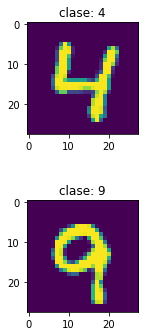

In [ ]:
# Tu código acá
n_ejemplos=2
fig, axs = subplots(nrows=2, figsize=(2,n_ejemplos*3))
indice_img=[56, 99]
for i in range(n_ejemplos):
  T , l = dataset[indice_img[i]]
  img = T.view(28,28).numpy()
  axs[i].set_title("clase: "+ str(l))
  axs[i].imshow(img)
  Prediccion = nn1.forward(T.view(1,784))
  print('Predicción imagen '+ str(i+1)+ ': '+str(torch.argmax(Prediccion)))

## 3d) Pasando todos los ejemplos por la red con un `DataLoader`

In [ ]:
# Acá tu código
import time
from torch.utils.data import DataLoader

def calcula_acierto(red_neuronal, dataset, batch_size=100, device='cpu'):
    red_neuronal.to('cpu')
    dataloader = DataLoader(dataset, batch_size) #Cargamos los datos
    aciertos_totales = torch.tensor([0]).cpu() 
    for x,y in dataloader: 
      x = x.view(batch_size,28*28).cpu() 
      clasificacion = red_neuronal.forward(x) 
      prediccion = torch.max(clasificacion,1)[1].cpu() 
      aciertos = torch.eq(prediccion,y.cpu()).sum().cpu() 
      aciertos_totales = aciertos_totales + aciertos 

    aciertos_totales  = aciertos_totales.cpu().tolist()[0] 
    return aciertos_totales/10000 * 100


nn1 = FFNN(784,[32,16],[relu,relu],10) #Creamos la red_neuronal
nn1.set_pesos(U,W1,W2,b1,b2,c) #Incorporamos los pesos entrenados 

tiempo_inicial = time.clock()  
valor = calcula_acierto(nn1,dataset,100,'cpu')  
tiempo = time.clock() - tiempo_inicial

print('')
print('Porcentaje de aciertos: '+str(valor)+ "% " + ", tiempo total: " + str(tiempo))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead



Porcentaje de aciertos: 96.12% , tiempo total: 1.222409999999999


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


Falto ver el caso en que la red neuronal trabaja con la gpu

### Corrección red

In [ ]:
# Tests del API del curso
from torch.utils.data import Subset
indices = corrector.get_test_data(homework=1, question="network", test=1, token=token)
test_set = Subset(dataset, indices)

# Modelo con los parámetros pre-entrenados para MNIST
your_network = nn1

# Montar el `test_set` en un tensor de (N, 28*28) usando DataLoader
X = list(DataLoader(test_set, batch_size=len(test_set)))[0][0].view(-1, 28*28)

# Almacenar el resultado en un puro tensor de (N,1)
result = torch.argmax(your_network.forward(X), dim=1)

corrector.submit(homework=1, question="network", test=1, token=token, answer=result)

Using cached test data
Correct Test!


## 3e) Opcional: Muestra los casos en donde la red se equivoca

In [ ]:
# Acá tu código

## 3d) Opcional: Crea tus propios ejemplos de dígitos para clasificar

In [ ]:
# Acá tu código